In [4]:
from pathlib import Path
import fastai
from fastai.vision import *
import matplotlib as plt
import torch
import numpy

In [5]:
DATA = Path('data')
# these folders must be in place
TRAIN_AUDIO_PATH = DATA/'nsynth-train/audio'
VALID_AUDIO_PATH = DATA/'nsynth-valid/audio'
TEST_AUDIO_PATH = DATA/'nsynth-test/audio'

NSYNTH_IMAGES = DATA/'nsynth-images'
TRAIN_IMAGE_PATH = NSYNTH_IMAGES/'train'
VALID_IMAGE_PATH = NSYNTH_IMAGES/'valid'
TEST_IMAGE_PATH = NSYNTH_IMAGES/'test'
MODEL_IMAGE_PATH = DATA/'nsynth-models'

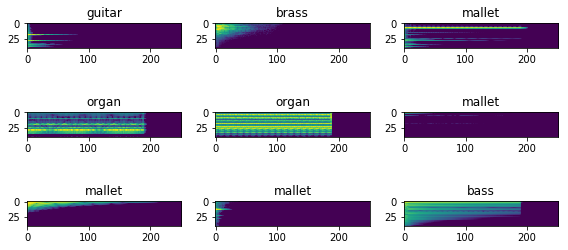

In [6]:
instrument_family_pattern = r'(\w+)_\w+_\d+-\d+-\d+.png$'
data = (ImageList.from_folder(NSYNTH_IMAGES)
        .split_by_folder()
        .label_from_re(instrument_family_pattern)
        .databunch())
data.c, data.classes
xs, ys = data.one_batch()
xs.shape, ys.shape
xs.min(), xs.max(), xs.mean(), xs.std()
data.show_batch(3, figsize=(8, 4), hide_axis=False)

In [7]:
torch.cuda.empty_cache()
learn = cnn_learner(data, models.resnet34,
                        metrics=accuracy, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,0.314379,1.016140,0.734752,14:36
1,0.139385,1.195204,0.758541,15:11
2,0.061138,1.131073,0.799727,19:28


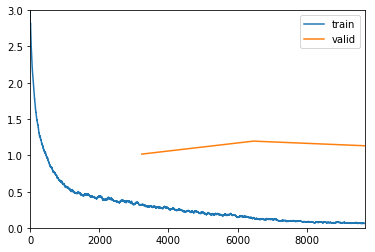

In [8]:
learn.fit_one_cycle(3, 0.005)

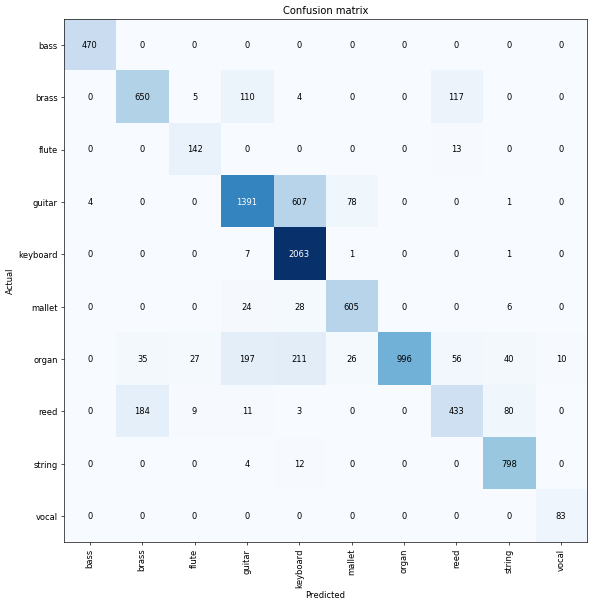

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

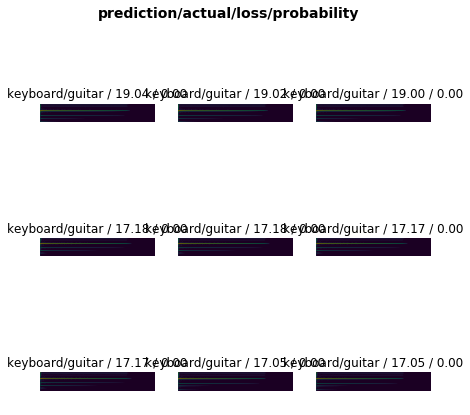

In [11]:
interp.plot_top_losses(9, figsize=(7,7))

In [12]:
learn.save('trained_model_MelSpec')

In [13]:
test_preds = learn.get_preds(DatasetType.Valid)

In [14]:
learn.data.c2i

{'bass': 0,
 'brass': 1,
 'flute': 2,
 'guitar': 3,
 'keyboard': 4,
 'mallet': 5,
 'organ': 6,
 'reed': 7,
 'string': 8,
 'vocal': 9}

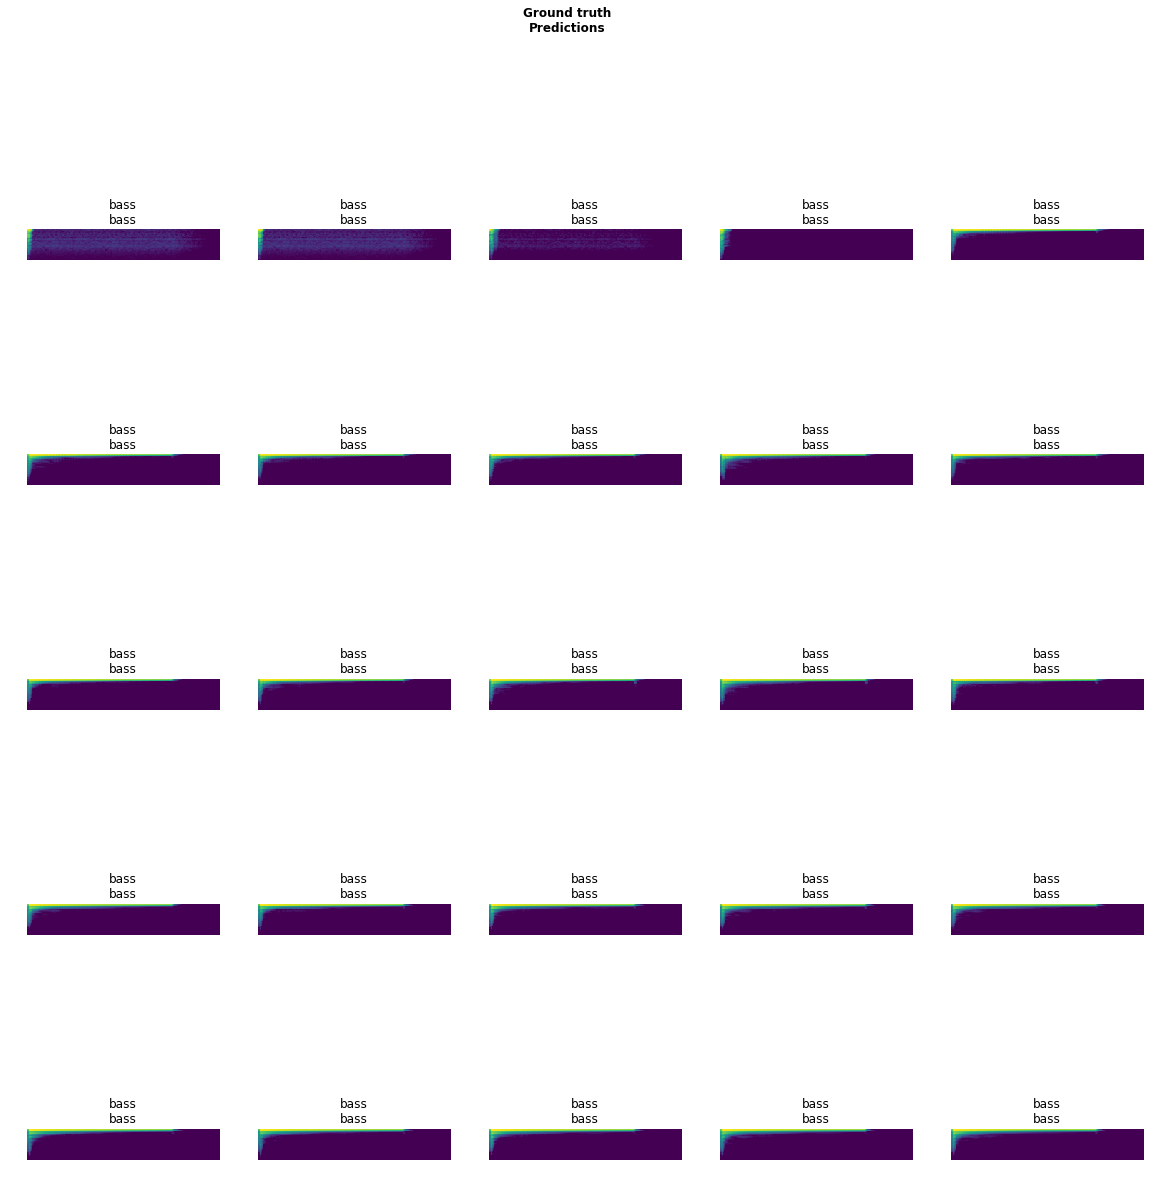

In [16]:
learn.show_results(ds_type=DatasetType.Valid)

In [18]:
interp.most_confused(min_val=10)

[('guitar', 'keyboard', 607),
 ('organ', 'keyboard', 211),
 ('organ', 'guitar', 197),
 ('reed', 'brass', 184),
 ('brass', 'reed', 117),
 ('brass', 'guitar', 110),
 ('reed', 'string', 80),
 ('guitar', 'mallet', 78),
 ('organ', 'reed', 56),
 ('organ', 'string', 40),
 ('organ', 'brass', 35),
 ('mallet', 'keyboard', 28),
 ('organ', 'flute', 27),
 ('organ', 'mallet', 26),
 ('mallet', 'guitar', 24),
 ('flute', 'reed', 13),
 ('string', 'keyboard', 12),
 ('reed', 'guitar', 11),
 ('organ', 'vocal', 10)]